In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
arr = np.load(os.path.join('..','data','chat_vectors_100.npy'))

In [3]:
chats = pd.read_csv(os.path.join('..','data','train','chats_train.csv'))

In [23]:
min_norm = 20
for i in range(len(arr)):
    if i != 4:
        if np.linalg.norm(arr[4]-arr[i]) < min_norm:
            min_norm = np.linalg.norm(arr[0]-arr[i])
            mini = i

In [24]:
min_norm

0.0

In [25]:
chats['text'].loc[4]

'Yes, youre right 👍'

In [26]:
chats['text'].loc[mini]

'Admin disputes in private thank you.'

In [28]:
np.linalg.norm(arr[4]-arr[0])

12.783774166286216

In [4]:
chats.head()

,chat_id,chat_title,emoji_list,sender_first_name,sender_id,sender_is_bot,sender_last_name,sender_username,text,timestamp
0,1129149026,Pareto Network - Discussion,[],Bezant,526106862,False,None,None,Admin disputes in private thank you.,1524284160
1,1129149026,Pareto Network - Discussion,[],Sheriff,538526216,False,None,None,I see Binance add coins all the time on the Cr...,1524284160
2,1146170349,Binance English,[],DaySandBox,400753764,True,None,daysandbox_bot,Removed msg from __Megzon Kadrija__. Reason: n...,1524285614
3,1146170349,Binance English,[],Kamalendu,435609627,False,Pal,None,Bc xvg dead,1524285372
4,1146170349,Binance English,[':thumbsup:'],Abdelbari,154857846,False,K,None,"Yes, youre right 👍",1524286342


In [5]:
top_chats = list(chats['chat_title'].value_counts()[:5].index)

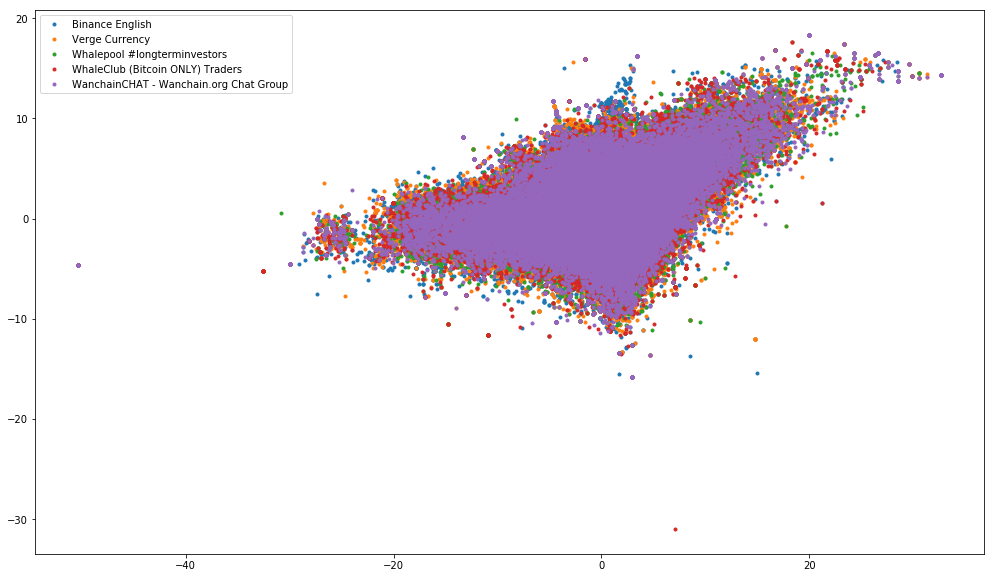

In [6]:
plt.figure(figsize=(17,10))
pca = PCA(n_components=2)
pca.fit(arr)
for chat in top_chats:
    X = pca.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


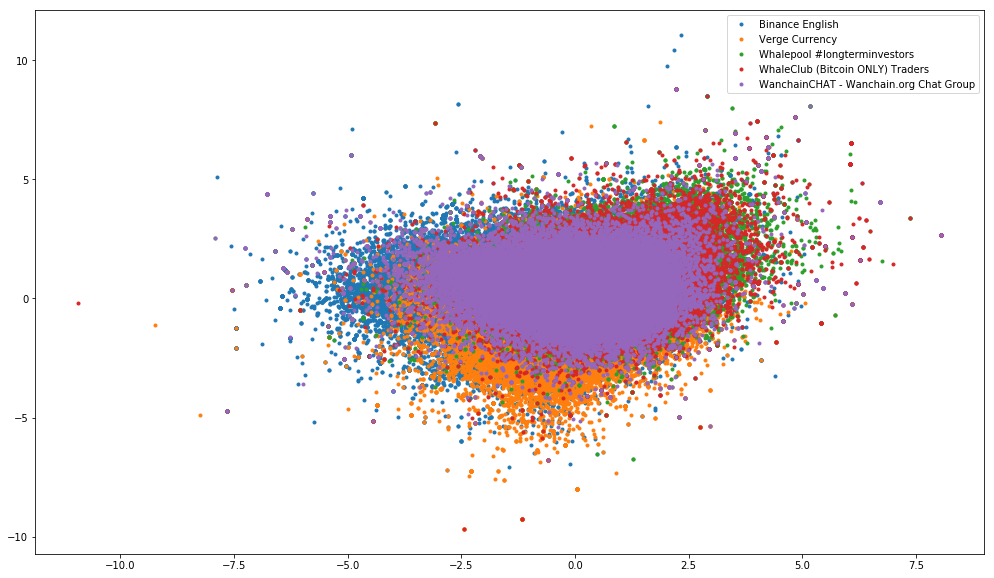

In [7]:
plt.figure(figsize=(17,10))
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(arr[chats['chat_title'].isin(top_chats)],chats['chat_title'].loc[chats['chat_title'].isin(top_chats)])
for chat in top_chats:
    X = lda.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(17,10))
tsne = TSNE(n_iter=250)
tsne.fit(arr[chats['chat_title'].isin(top_chats)])
for chat in top_chats:
    X = tsne.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')